### Name : Rishikeh Vadodaria
### Roll No. : C114
### Aim : Observe and interact with Various game environments in Gymnasium

#### Installing requirements

In [ ]:
!pip install gym[all]
!pip install pyvirtualdisplay  
!apt-get install -y xvfb   
!pip install atari-py

##### Testing basic installation

In [1]:
import gymnasium as gym

env = gym.make("LunarLander-v3", render_mode="human")
observation, info = env.reset()

episode_over = False
while not episode_over:
    action = env.action_space.sample()  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)

    episode_over = terminated or truncated

env.close()

#### i.	Explore any three classic control gym environment

CartPole-v1
The agent balances a pole on a cart by applying forces left or right.

MountainCar-v0
The agent drives a car up a steep hill. It requires momentum to succeed.

Acrobot-v1
The agent controls a two-link pendulum to swing up to a certain height.

### CartPole-v1

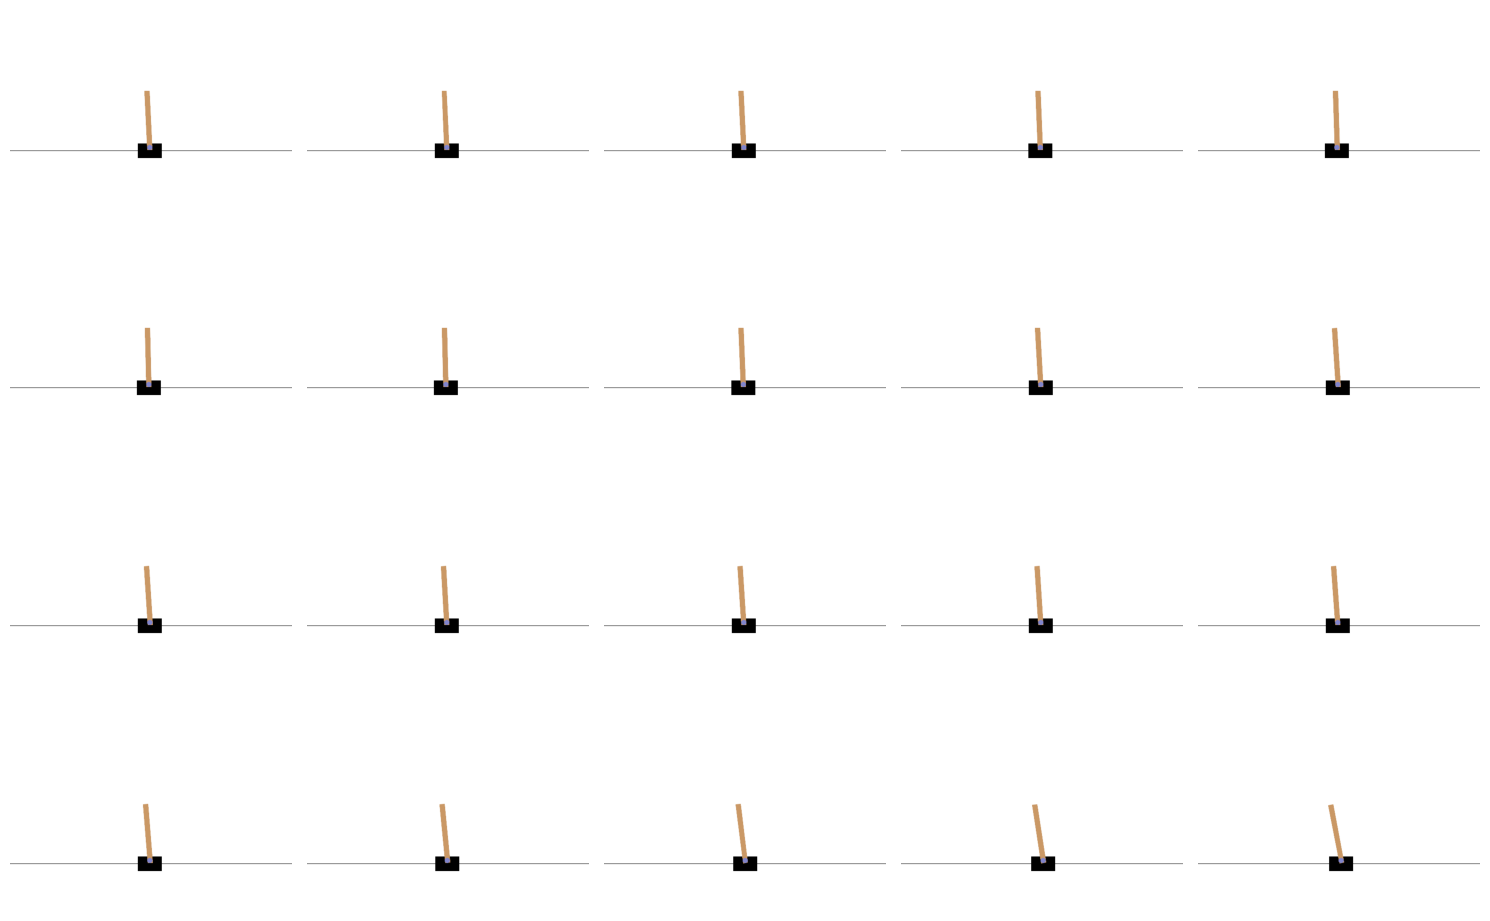

In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt

env = gym.make("CartPole-v1", render_mode="rgb_array")
observation, info = env.reset()

frames = []
episode_over = False
while not episode_over and len(frames) < 20:  # Capture only 20 frames
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    frames.append(env.render())  # Capture frame
    episode_over = terminated or truncated

env.close()

# Plot 20 frames as images
fig, axes = plt.subplots(4, 5, figsize=(15, 10))
axes = axes.ravel()
for i in range(20):
    axes[i].imshow(frames[i])
    axes[i].axis("off")
plt.tight_layout()
plt.show()


### Customized CartPole Environment

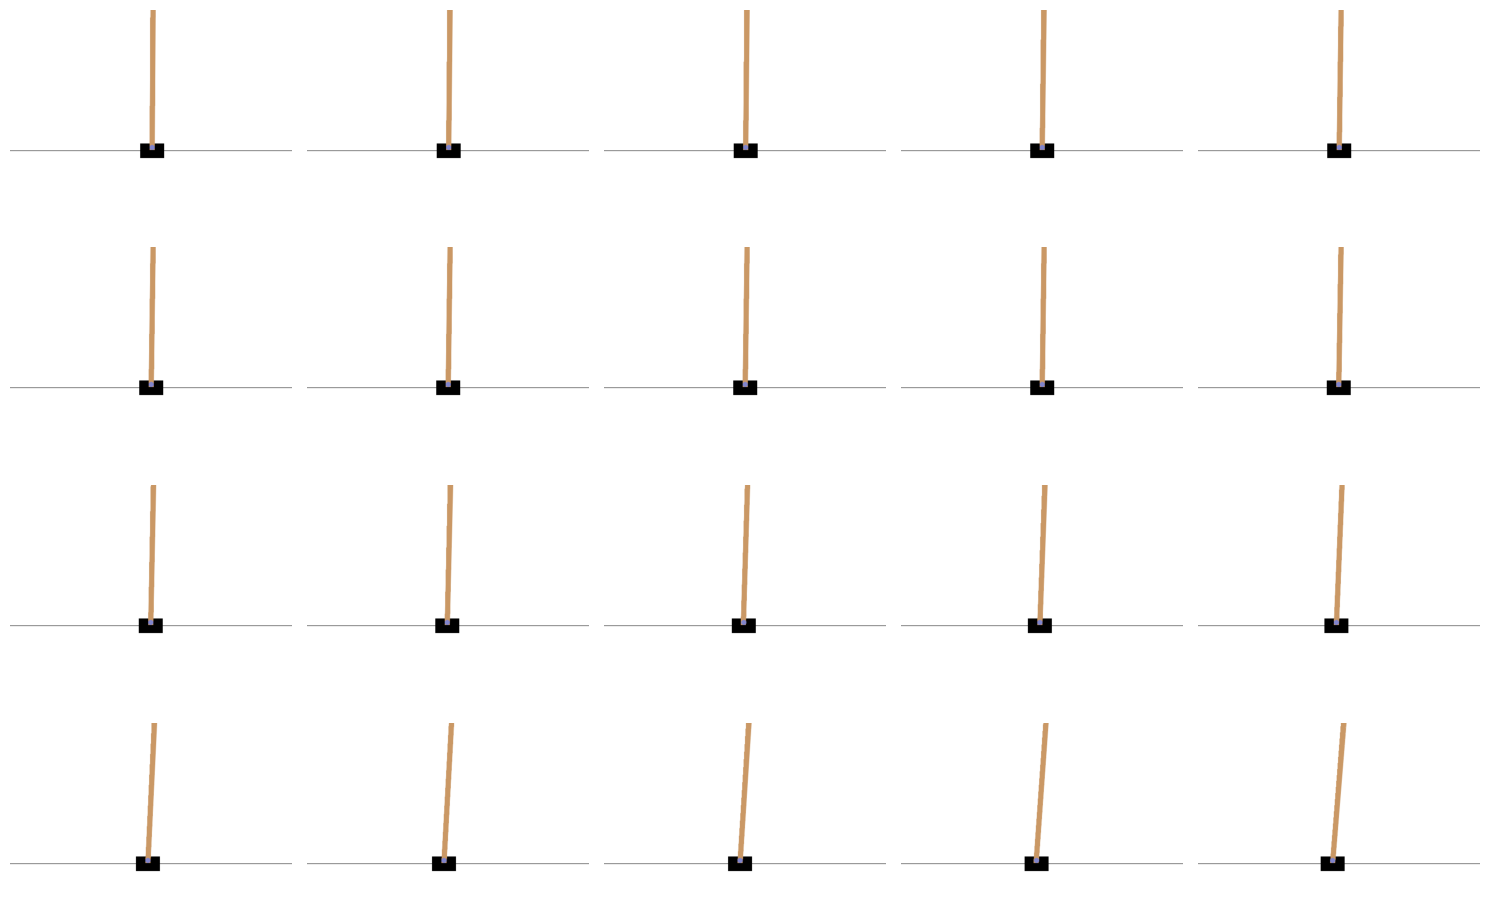

In [6]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from gymnasium.envs.classic_control.cartpole import CartPoleEnv

# Create a custom CartPole environment
class CustomCartPoleEnv(CartPoleEnv):
    def __init__(self, gravity=9.8, masscart=1.0, masspole=0.1, length=0.5, render_mode=None):
        super().__init__(render_mode=render_mode)
        self.gravity = gravity
        self.masscart = masscart
        self.masspole = masspole
        self.length = length  # Half the pole's length

        # Recalculate other constants that depend on these parameters
        self.total_mass = self.masspole + self.masscart
        self.polemass_length = self.masspole * self.length

# Register the custom environment
gym.envs.registration.register(
    id="CustomCartPole-v1",
    entry_point=CustomCartPoleEnv,
    max_episode_steps=500,
)

# Instantiate the environment
env = gym.make("CustomCartPole-v1", gravity=15.0, masscart=2.0, masspole=0.2, length=1.5, render_mode="rgb_array")

observation, info = env.reset()

frames = []
episode_over = False
while not episode_over and len(frames) < 20:  # Capture only 20 frames
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    frames.append(env.render())  # Capture frame
    episode_over = terminated or truncated

env.close()

# Plot 20 frames as images
fig, axes = plt.subplots(4, 5, figsize=(15, 10))
axes = axes.ravel()
for i in range(20):
    axes[i].imshow(frames[i])
    axes[i].axis("off")
plt.tight_layout()
plt.show()


#### Observations
Gravity Effect:
Increasing gravity makes the pole fall more quickly, making it harder for the agent to balance.

Cart Mass Effect:
Increasing cart mass slows down the movement of the cart, affecting how quickly it can stabilize the pole.

Pole Length Effect:
Increasing pole length increases the moment of inertia, making the pole more stable but slower to react to corrective actions.

### MountainCar-v0

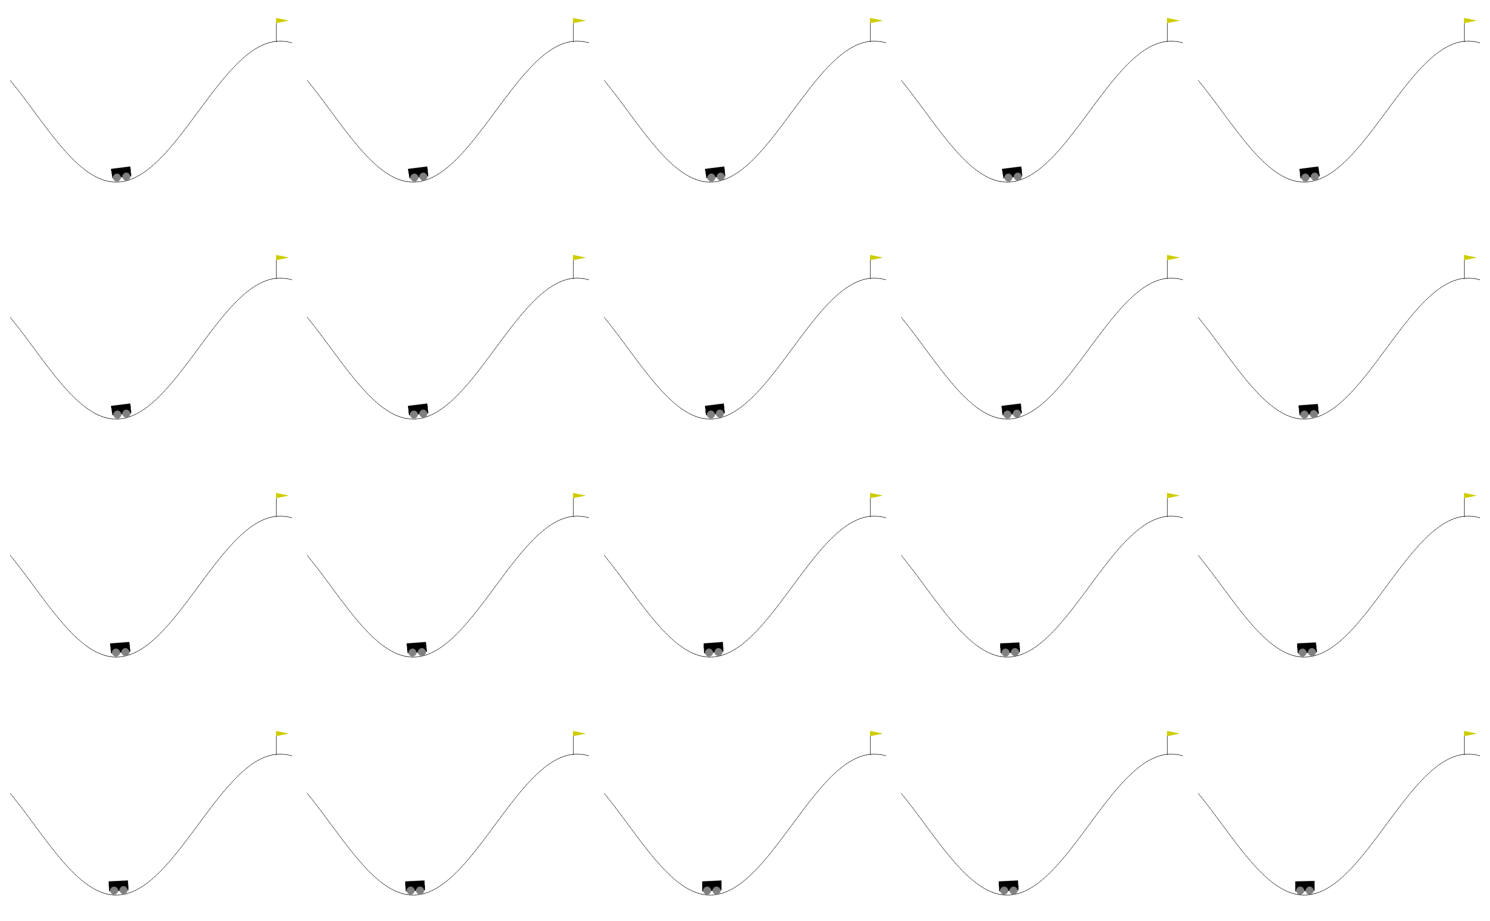

In [2]:
import gymnasium as gym
import matplotlib.pyplot as plt

env = gym.make("MountainCar-v0", render_mode="rgb_array")
observation, info = env.reset()

frames = []
episode_over = False
while not episode_over and len(frames) < 20:  # Capture only 20 frames
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    frames.append(env.render())  # Capture frame
    episode_over = terminated or truncated

env.close()

# Plot 20 frames as images
fig, axes = plt.subplots(4, 5, figsize=(15, 10))
axes = axes.ravel()
for i in range(20):
    axes[i].imshow(frames[i])
    axes[i].axis("off")
plt.tight_layout()
plt.show()


### Customizing MountainCar

c:\Users\Rishikesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\gymnasium\envs\registration.py:642: UserWarning: WARN: Overriding environment CustomMountainCar-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


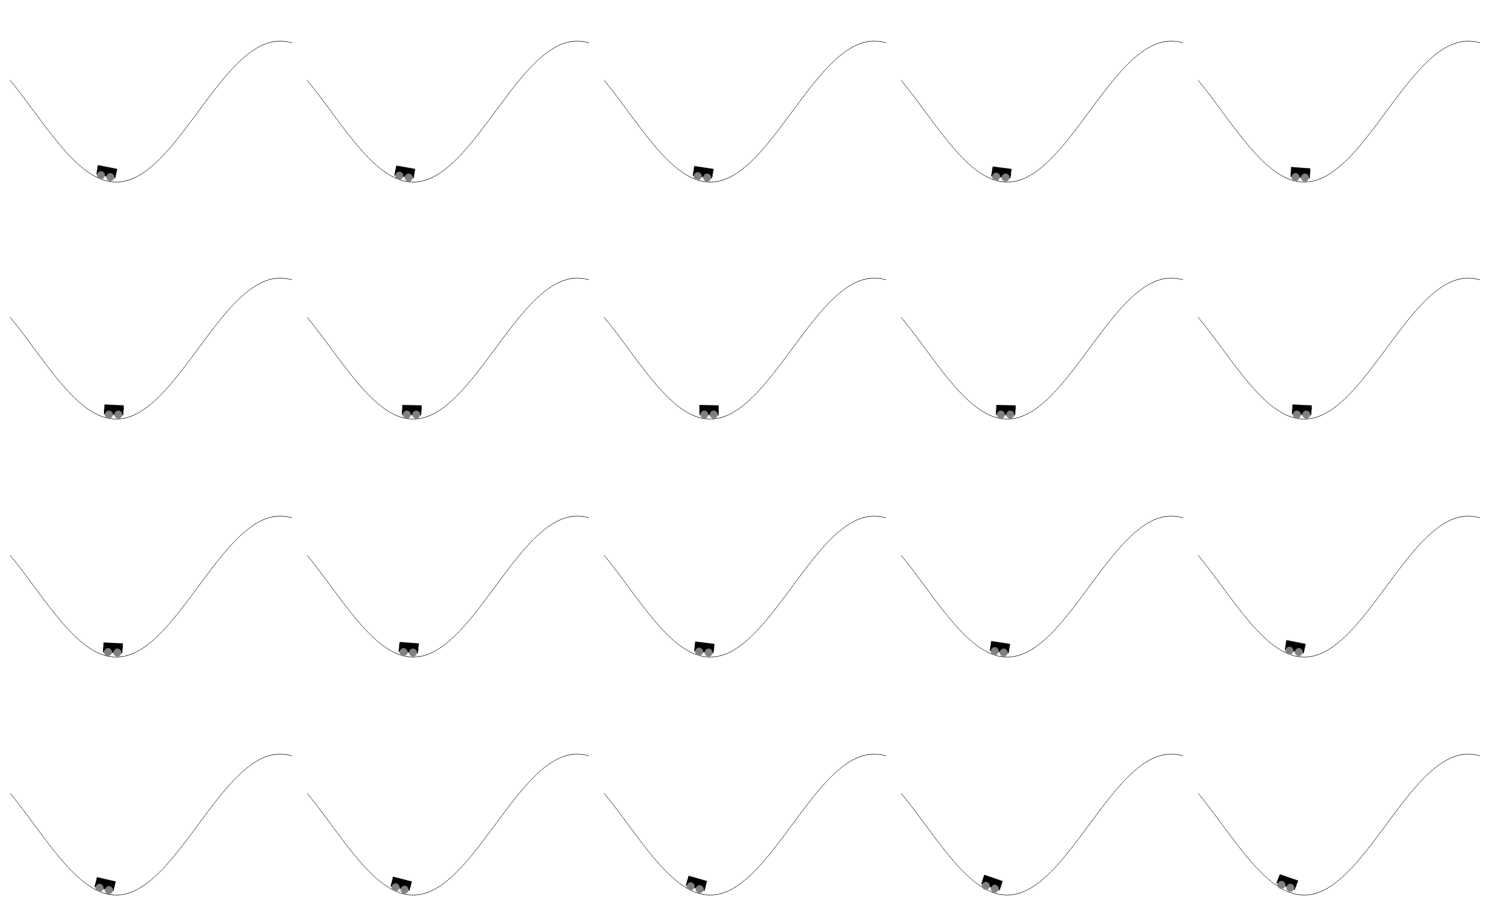

In [8]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from gymnasium.envs.classic_control.mountain_car import MountainCarEnv

# Custom MountainCar environment
class CustomMountainCarEnv(MountainCarEnv):
    def __init__(self, goal_position=-0.5, force=0.002, gravity=0.001, render_mode=None):
        super().__init__(render_mode=render_mode)
        self.goal_position = goal_position
        self.force = force
        self.gravity = gravity

    def step(self, action):
        assert self.action_space.contains(action), f"{action!r} invalid"

        position, velocity = self.state
        velocity += (action - 1) * self.force - np.cos(3 * position) * self.gravity
        velocity = np.clip(velocity, -self.max_speed, self.max_speed)
        position += velocity
        position = np.clip(position, self.min_position, self.max_position)

        if position == self.min_position and velocity < 0:
            velocity = 0

        # Check if the car has reached the goal position
        terminated = bool(position >= self.goal_position)
        reward = 0 if terminated else -1.0

        self.state = (position, velocity)
        return np.array(self.state, dtype=np.float32), reward, terminated, False, {}

# Register the custom environment
gym.envs.registration.register(
    id="CustomMountainCar-v0",
    entry_point=CustomMountainCarEnv,
    max_episode_steps=200,
)

# Instantiate the custom environment
env = gym.make("CustomMountainCar-v0", goal_position=0.6, force=0.004, gravity=0.002, render_mode="rgb_array")

observation, info = env.reset()

# Capture frames
frames = []
episode_over = False
while not episode_over and len(frames) < 20:  # Capture only 20 frames
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    frames.append(env.render())  # Capture frame
    episode_over = terminated or truncated

env.close()

# Plot 20 frames as images
fig, axes = plt.subplots(4, 5, figsize=(15, 10))
axes = axes.ravel()
for i in range(20):
    axes[i].imshow(frames[i])
    axes[i].axis("off")
plt.tight_layout()
plt.show()


#### Observations 
Default: The car struggles to build momentum to reach the default goal.
Customized: With increased force and gravity, the car’s movements are quicker but harder to control.
Performance:

Increased force and gravity create a trade-off, where faster acceleration may overshoot the target.

### Acrobot-v1

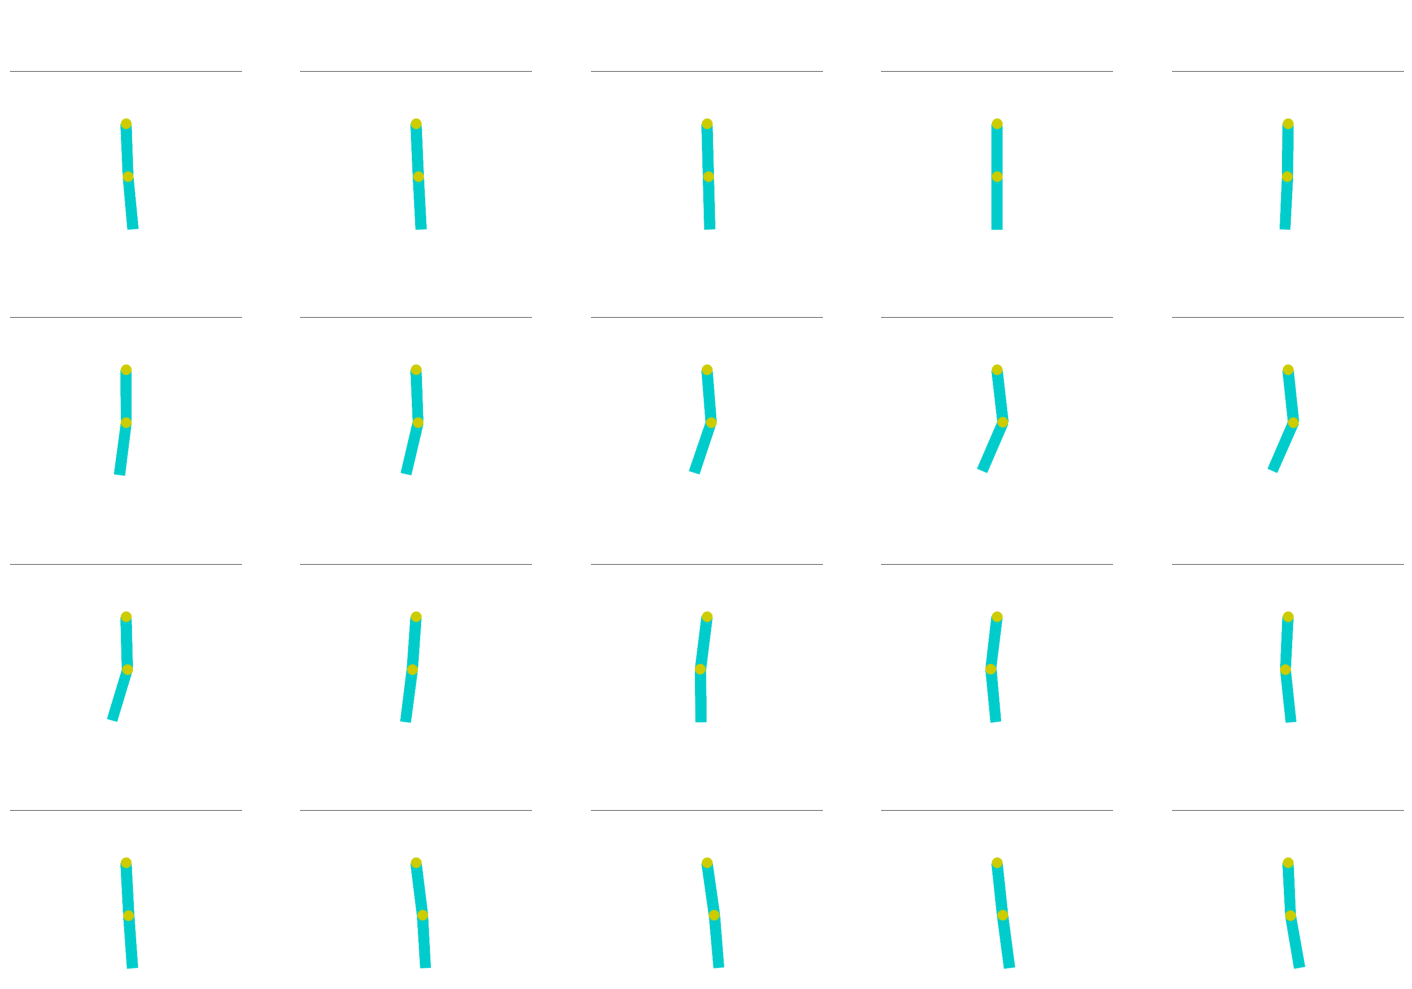

In [3]:
import gymnasium as gym
import matplotlib.pyplot as plt

env = gym.make("Acrobot-v1", render_mode="rgb_array")
observation, info = env.reset()

frames = []
episode_over = False
while not episode_over and len(frames) < 20:  # Capture only 20 frames
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    frames.append(env.render())  # Capture frame
    episode_over = terminated or truncated

env.close()

# Plot 20 frames as images
fig, axes = plt.subplots(4, 5, figsize=(15, 10))
axes = axes.ravel()
for i in range(20):
    axes[i].imshow(frames[i])
    axes[i].axis("off")
plt.tight_layout()
plt.show()


### Customizing Acrobot

c:\Users\Rishikesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\gymnasium\envs\registration.py:642: UserWarning: WARN: Overriding environment CustomAcrobot-v1 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


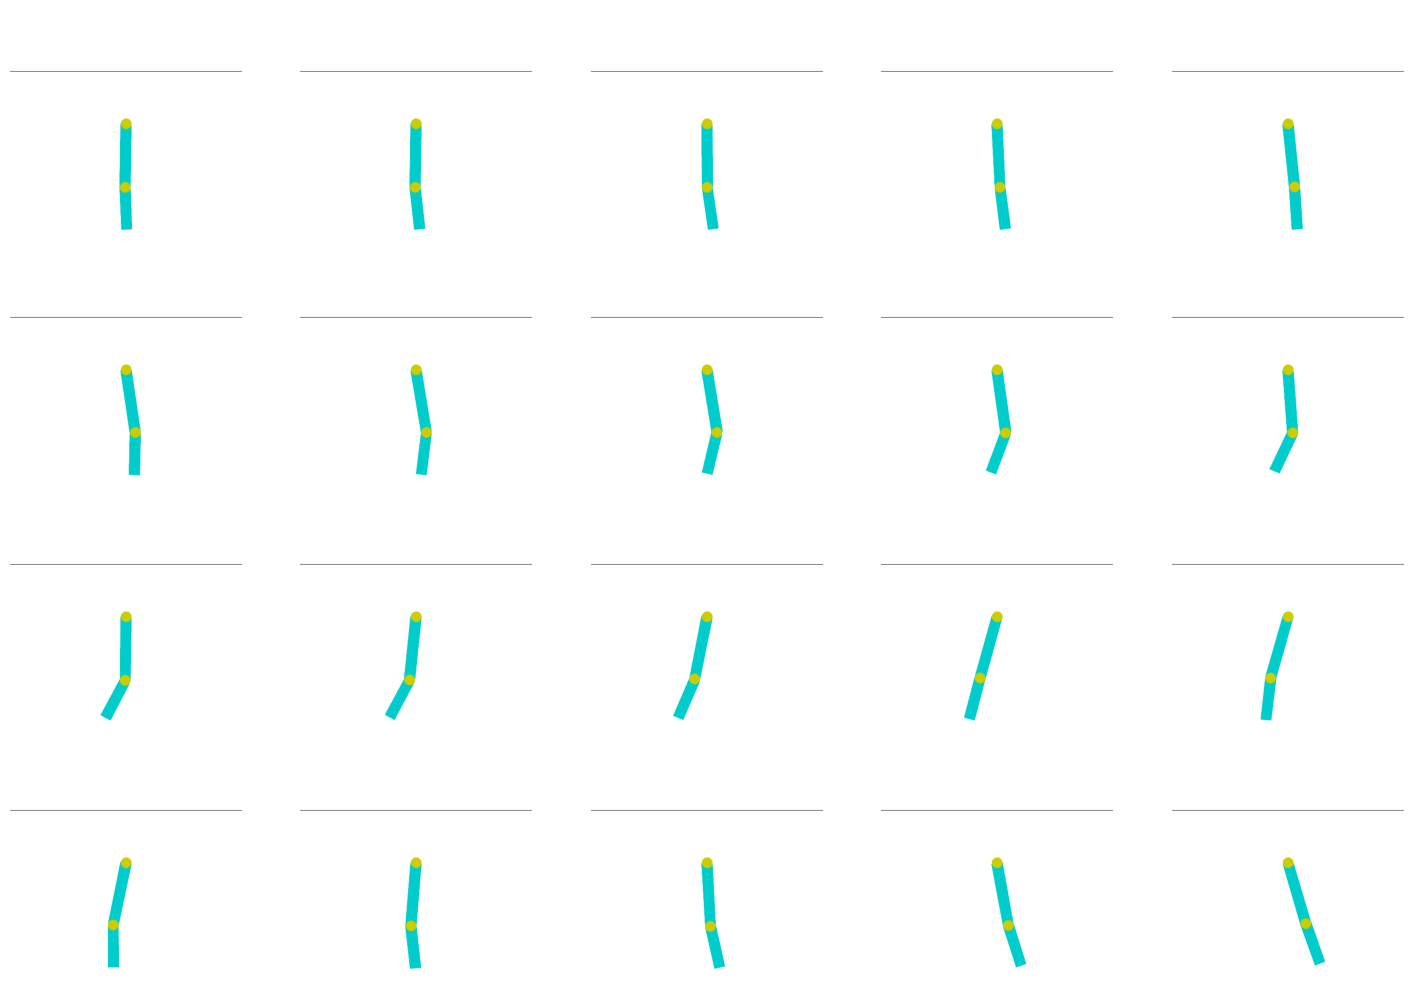

In [10]:
import gymnasium as gym
import matplotlib.pyplot as plt
from gymnasium.envs.classic_control.acrobot import AcrobotEnv
import numpy as np

# Custom Acrobot environment
class CustomAcrobotEnv(AcrobotEnv):
    def __init__(self, link_length_1=1.0, link_length_2=1.0, link_mass_1=1.0, link_mass_2=1.0, render_mode=None):
        super().__init__(render_mode=render_mode)
        self.LINK_LENGTH_1 = link_length_1  # Length of the first link
        self.LINK_LENGTH_2 = link_length_2  # Length of the second link
        self.LINK_MASS_1 = link_mass_1  # Mass of the first link
        self.LINK_MASS_2 = link_mass_2  # Mass of the second link

    def step(self, action):
        return super().step(action)  # Use the default step logic

# Register the custom environment
gym.envs.registration.register(
    id="CustomAcrobot-v1",
    entry_point=CustomAcrobotEnv,
    max_episode_steps=500,
)

# Instantiate the custom environment with modified parameters
env = gym.make(
    "CustomAcrobot-v1",
    link_length_1=1.2,  # Longer first link
    link_length_2=0.8,  # Shorter second link
    link_mass_1=1.5,  # Heavier first link
    link_mass_2=0.5,  # Lighter second link
    render_mode="rgb_array",
)

# Run the simulation
observation, info = env.reset()
frames = []
episode_over = False

while not episode_over and len(frames) < 20:  # Capture only 20 frames
    action = env.action_space.sample()  # Random actions
    observation, reward, terminated, truncated, info = env.step(action)
    frames.append(env.render())  # Capture frame
    episode_over = terminated or truncated

env.close()

# Plot 20 frames as images
fig, axes = plt.subplots(4, 5, figsize=(15, 10))
axes = axes.ravel()
for i in range(20):
    axes[i].imshow(frames[i])
    axes[i].axis("off")
plt.tight_layout()
plt.show()


#### Observations
- Default Behavior:

Both links have equal length and mass, requiring precise torque to swing and reach the goal.
- Customized Behavior:

Longer and heavier first link slows momentum buildup.
Shorter and lighter second link improves upper pendulum control.
Asymmetric dynamics alter the strategy to reach the goal.

# Conclusion : After the succesfull completion of this experiment, I Observed various games in the Gymnasium Environment using Python.